In [1]:
'''Import your data into a Pandas DataFrame.
Merge your DataFrames.
Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
Determine the mean, median, and mode for the following:
The total number of rides for each city type.
The average fares for each city type.
The total number of drivers for each city type.
Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
The number of rides for each city type.
The fares for each city type.
The number of drivers for each city type.
Create a pie chart that visualizes each of the following data for each city type:
The percent of total fares.
The percent of total rides.
The percent of total drivers.'''

'Import your data into a Pandas DataFrame.\nMerge your DataFrames.\nCreate a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.\nDetermine the mean, median, and mode for the following:\nThe total number of rides for each city type.\nThe average fares for each city type.\nThe total number of drivers for each city type.\nCreate box-and-whisker plots that visualize each of the following to determine if there are any outliers:\nThe number of rides for each city type.\nThe fares for each city type.\nThe number of drivers for each city type.\nCreate a pie chart that visualizes each of the following data for each city type:\nThe percent of total fares.\nThe percent of total rides.\nThe percent of total drivers.'

In [2]:
#dependencies
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

In [3]:
city_data_file = 'Resources/city_data.csv'
ride_data_file = 'Resources/ride_data.csv'
city_df = pd.read_csv(city_data_file)
ride_df = pd.read_csv(ride_data_file)
city_df.head()
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [4]:
#5.2.4 Explore data in pandas

#Inspecting city df

#Get all the rows that contain null values.
city_df.count
#or 
city_df.isnull().sum()






city            0
driver_count    0
type            0
dtype: int64

In [5]:
#Make sure the driver_count column has an integer data type.
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
#Find out how many data points there are for each type of city.
city_df.type.unique()
#array(['Urban', 'Suburban', 'Rural'], dtype=object)

sum(city_df.type == 'Urban')
#66

sum(city_df.type == 'Suburban')
#36

sum(city_df.type == 'Rural')
#18


###Better way to do this is 


city_df.type.value_counts()
# Urban       66
# Suburban    36
# Rural       18
# Name: type, dtype: int64

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [7]:
# Do the same thing for ride data
ride_df.count()
ride_df.isnull().sum()

ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [8]:
pyber_data_df = pd.merge(ride_df, city_df, how = 'left', on = ['city', 'city'])

pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [9]:
#5.3.1 Create DataFrames for Each Type of City

urban_df = pyber_data_df[pyber_data_df.type == 'Urban']
suburban_df = pyber_data_df[pyber_data_df.type == 'Suburban']
rural_df = pyber_data_df[pyber_data_df.type == 'Rural']

In [10]:
# Get the number of rides for each city in each type
urban_ride_count_s = urban_df.groupby(["city"]).count().ride_id
suburban_ride_count_s = suburban_df.groupby(['city']).count().ride_id
rural_ride_count_s = rural_df.groupby(['city']).count().ride_id



In [11]:
#Get avg fare for each city in each type

urban_avg_fare_s = urban_df.groupby(["city"]).mean().fare
suburban_avg_fare_s = suburban_df.groupby(["city"]).mean().fare
rural_avg_fare_s = rural_df.groupby(["city"]).mean().fare



In [12]:
#num of drivers for each city type

urban_driver_count_s = urban_df.groupby(['city']).mean().driver_count
suburban_driver_count_s = suburban_df.groupby(['city']).mean().driver_count
rural_driver_count_s = rural_df.groupby(['city']).mean().driver_count
urban_driver_count_s

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

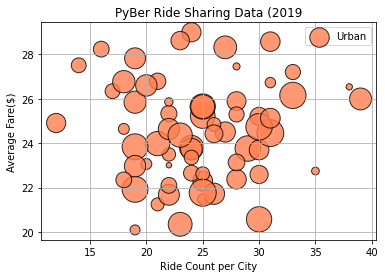

In [13]:
#5.3.5 Creating the bubble charts
#plot avg fare(y) vs ride count (x)

#add title, legend, axis lables, set size equal to number of drivers, change color
plt.scatter(urban_ride_count_s, urban_avg_fare_s, 
            s = urban_driver_count_s*10, c='coral', 
            edgecolors='black', linewidths=1, 
            alpha=.8, label = 'Urban' )

plt.title('PyBer Ride Sharing Data (2019')
plt.xlabel('Ride Count per City')
plt.ylabel('Average Fare($)')
plt.grid(True)
plt.legend()


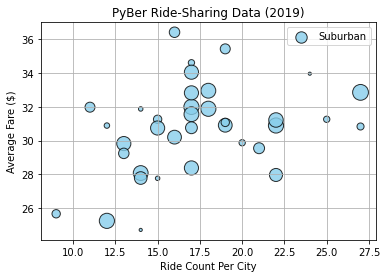

In [14]:
#Suburban Bubble Chart

plt.scatter(suburban_ride_count_s,
      suburban_avg_fare_s,
      s=10*suburban_driver_count_s, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Ride Count Per City")
plt.grid(True)
# Add the legend.
plt.legend()


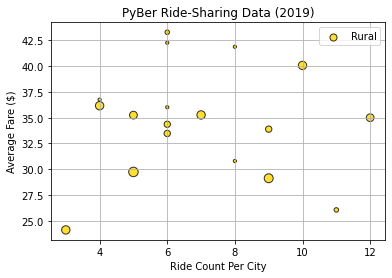

In [15]:
#Rural Bubble Chart
plt.scatter(rural_ride_count_s,
      rural_avg_fare_s,
      s=10*rural_driver_count_s, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Ride Count Per City")
plt.grid(True)
# Add the legend.
plt.legend()

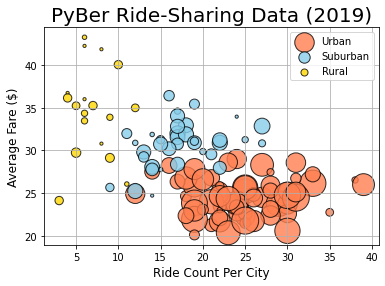

In [16]:
#5.3.6 Show all city types on same chart
plt.scatter(urban_ride_count_s, urban_avg_fare_s, 
            s = urban_driver_count_s*10, c='coral', 
            edgecolors='black', linewidths=1, 
            alpha=.8, label = 'Urban' )

plt.scatter(suburban_ride_count_s,
      suburban_avg_fare_s,
      s=10*suburban_driver_count_s, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count_s,
      rural_avg_fare_s,
      s=10*rural_driver_count_s, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.xlabel("Ride Count Per City", fontsize = 12)
plt.grid(True)
plt.legend()

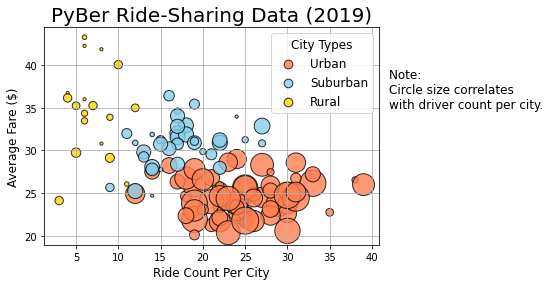

In [21]:
#Cleaning up the legend

plt.scatter(urban_ride_count_s, urban_avg_fare_s, 
            s = urban_driver_count_s*10, c='coral', 
            edgecolors='black', linewidths=1, 
            alpha=.8, label = 'Urban' )

plt.scatter(suburban_ride_count_s,
      suburban_avg_fare_s,
      s=10*suburban_driver_count_s, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count_s,
      rural_avg_fare_s,
      s=10*rural_driver_count_s, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.xlabel("Ride Count Per City", fontsize = 12)
plt.grid(True)
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#add text label explaining circle size

plt.text(42, 35, "Note: \nCircle size correlates \nwith driver count per city.", fontsize="12")

#save chart to analysis folder

plt.savefig('Analysis/Fig1.png', dpi = 300, bbox_inches = 'tight')

